In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
case = pd.read_csv('data/new/case_maret_july.csv')

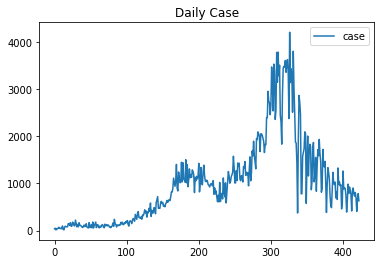

In [3]:
case.plot()
plt.title("Daily Case")
plt.show()

In [4]:
case['date'] = case['date'].astype('datetime64[ns]')
case.set_index('date', inplace=True)
case.head()

,case
date,
2020-03-18,38
2020-03-19,50
2020-03-20,14
2020-03-21,44
2020-03-22,36


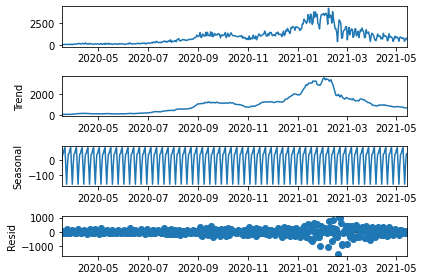

In [5]:
decompose = seasonal_decompose(case, model='additive', extrapolate_trend='freq')
decompose.plot()
plt.show()

In [6]:
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid
actual = decompose.observed

In [7]:
new_trend = trend.to_frame()
new_seasonal = seasonal.to_frame()
new_residual = residual.to_frame()
new_actual = actual.to_frame()

In [8]:
new_seasonal

,seasonal
date,
2020-03-18,-40.116647
2020-03-19,39.596803
2020-03-20,46.139292
2020-03-21,71.891567
2020-03-22,84.486805
...,...
2021-05-10,-36.913195
2021-05-11,-165.084624
2021-05-12,-40.116647


In [9]:
model = ARIMA(new_trend, order=(2,0,1))
model_fit = model.fit()

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [10]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  trend   No. Observations:                  423
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2257.248
Date:                Mon, 13 Sep 2021   AIC                           4524.496
Time:                        10:34:14   BIC                           4544.733
Sample:                    03-18-2020   HQIC                          4532.492
                         - 05-14-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        989.8463    567.547      1.744      0.081    -122.525    2102.218
ar.L1          1.7401      0.033     52.870      0.000       1.676       1.805
ar.L2         -0.7426      0.033    -22.614      0.0

In [11]:
hasil = model_fit.forecast(10)

In [13]:
hasil.head()

2021-05-15    642.952970
2021-05-16    639.790114
2021-05-17    638.314723
2021-05-18    638.096136
2021-05-19    638.811408
Freq: D, Name: predicted_mean, dtype: float64